# Homework 3

Name: Ali Furkan Kalay

ID: 45625365

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, optimize

def_fig_size = (14,5)

# Question 1

$$ f(x) = (x+1)^{(1/4)} $$

The function and its derivative:

In [2]:
func1 = lambda x: (x+1) ** (1/4)
func1v = np.vectorize(func1)

Boundries:

In [3]:
xlb = -1.0
xub = 1.0

Grid, steps, point values:

In [4]:
x_grid = np.arange(xlb, xub, step = 0.01) 
fx_grid = func1v(x_grid)
step_data = (xub-xlb)/4
x_data = np.array([xlb+i*step_data for i in range(5)])
fx_data = func1v(x_data)

### 1. Chebyshev interpolation

We find the Chebychev $x$ points to evaluate:

In [5]:
m = 5

x_data_cheb = np.zeros(m)
for i in range(m):
    x_data_cheb[i] = xlb + (xub-xlb)/2*(-np.cos((2*(i+1)-1)*np.pi/(2*m))+1.0)
    
fx_data_cheb = func1v(x_data_cheb)    

Chebychev interpolation with $m=5$ and $n=4$

In [6]:
# Choose n <= m-1
n = 4

coef = np.zeros(n+1)

Tmat = np.zeros((n+1,m))
Tmat[0,:] = 1.0
Tmat[1,:] = x_data_cheb[:]

for k in range(2,n+1):
    Tmat[k,:] = 2*np.reshape(x_data_cheb,(1,m))*Tmat[k-1,:]-Tmat[k-2,:]

    
for k in range(n+1):
    coef[k] = np.array(fx_data_cheb)@Tmat[k,:]
    
coef[0] /= m
coef[1:] /= (m/2)

fx_cheb = np.polynomial.chebyshev.chebval(x_grid,coef)
fx_cheb_error = fx_grid - fx_cheb

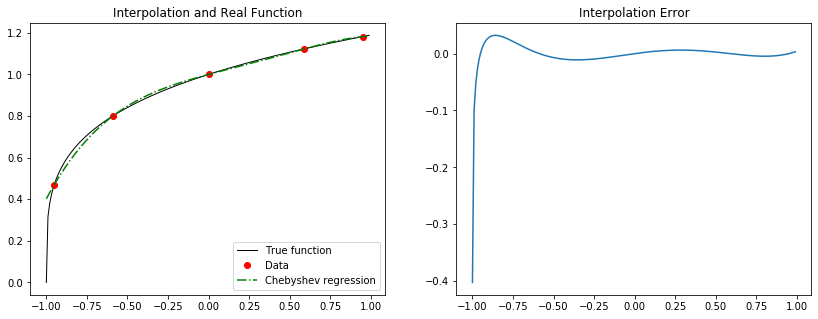

In [7]:
fig, ax = plt.subplots(1,2, figsize = def_fig_size)

line1, = ax[0].plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax[0].plot(x_data_cheb, fx_data_cheb, 'ro', linewidth=1, label='Data')
line3, = ax[0].plot(x_grid, fx_cheb, 'g-.', label='Chebyshev regression')
ax[0].legend(loc='lower right')
ax[0].set_title('Interpolation and Real Function')
line4, = ax[1].plot(x_grid, fx_cheb_error, label = 'Error')
ax[1].set_title('Interpolation Error')
plt.show()

Chebyshev interpolation seems to have good fit except the initial point. 

### 2. Lagrange interpolation

I will take the Lagrange interpolation function from lecture notes:

In [8]:
def laginterp(x,y):
    
    # return polynomial 
    
    x0, y0 = x[:],y[:]
    
    n = len(x)
    np.reshape(x0, (n,1))
    np.reshape(y0, (n,1))
    
    Vmat = np.ones((n,n))
    for i in range(1,n):
        Vmat[:,i] = x0**i
        
    a = np.linalg.solve(Vmat,y0)
        
    return np.poly1d(a[::-1])

The nodes are defined in the previous part, so we can estimate interpolation:

In [9]:
int_Lag = laginterp(x_data,fx_data)
fx_Lag = int_Lag(x_grid)
fx_Lag_error = fx_grid - fx_Lag

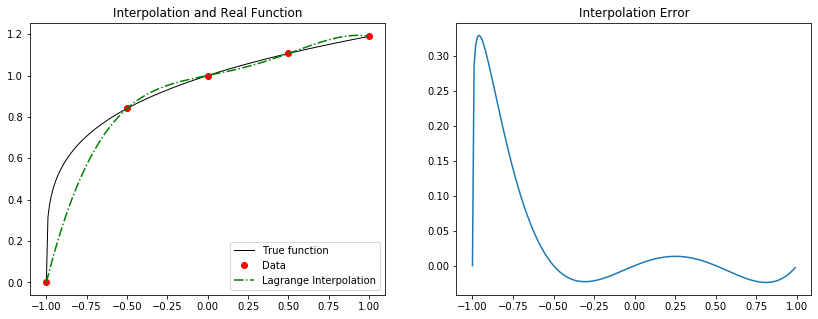

In [10]:
fig, ax = plt.subplots(1,2, figsize = def_fig_size)

line1, = ax[0].plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax[0].plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax[0].plot(x_grid, fx_Lag, 'g-.', label='Lagrange Interpolation')
ax[0].legend(loc='lower right')
ax[0].set_title('Interpolation and Real Function')
line4, = ax[1].plot(x_grid, fx_Lag_error, label = 'Error')
ax[1].set_title('Interpolation Error')
plt.show()

Lagrange interpolation works poorly between -1 and -0.5 interval. 

### 3. Cubic spline with the natural spline

In [11]:
int_Ncubic = interpolate.CubicSpline(x_data,fx_data,bc_type='clamped')
fx_Ncubic = int_Ncubic(x_grid)
fx_Ncubic_error = fx_grid - fx_Ncubic

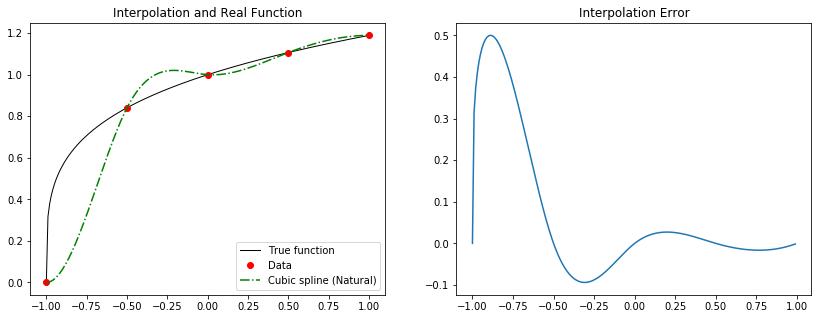

In [12]:
fig, ax = plt.subplots(1,2, figsize = def_fig_size)

line1, = ax[0].plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax[0].plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax[0].plot(x_grid, fx_Ncubic, 'g-.', label='Cubic spline (Natural)')
ax[0].legend(loc='lower right')
ax[0].set_title('Interpolation and Real Function')
line4, = ax[1].plot(x_grid, fx_Ncubic_error, label = 'Error')
ax[1].set_title('Interpolation Error')
plt.show()

Cubic spline performs extremely poorly. It is mostly because initial node assumed to have 0 slope which is pretty step. 

### 4. Cubic spline with the secant Hermit spline

The secant Hermite spline: $s'(x_0)=\frac{f(x_1)-f(x_0)}{x_1-x_0}$ and $s'(x_n)=\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}.$ So `bc_type` is as following:

In [13]:
bc_type_values = ((1, (func1(x_data[1]) - func1(x_data[0]))/(x_data[1]-x_data[0])),
                  (1, (func1(x_data[-2]) - func1(x_data[-1]))/(x_data[-2]-x_data[-1])))
bc_type_values

((1, 1.681792830507429), (1, 0.1650503906047991))

In [14]:
int_Ncubic_H = interpolate.CubicSpline(x_data,fx_data,bc_type=bc_type_values)
fx_Ncubic_H = int_Ncubic_H(x_grid)
fx_Ncubic_H_error = fx_grid - fx_Ncubic

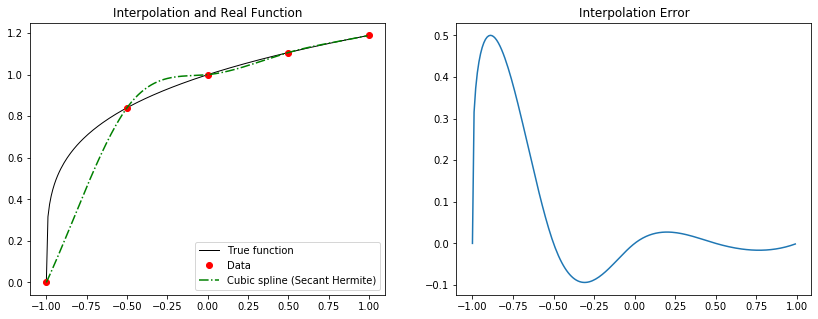

In [15]:
fig, ax = plt.subplots(1,2, figsize = def_fig_size)

line1, = ax[0].plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax[0].plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax[0].plot(x_grid, fx_Ncubic_H, 'g-.', label='Cubic spline (Secant Hermite)')
ax[0].legend(loc='lower right')
ax[0].set_title('Interpolation and Real Function')
line4, = ax[1].plot(x_grid, fx_Ncubic_H_error, label = 'Error')
ax[1].set_title('Interpolation Error')
plt.show()

Hermit spline partly corrects Natural Cubic spline errors at the initial node, but still performs bad. Let's compare the errors:

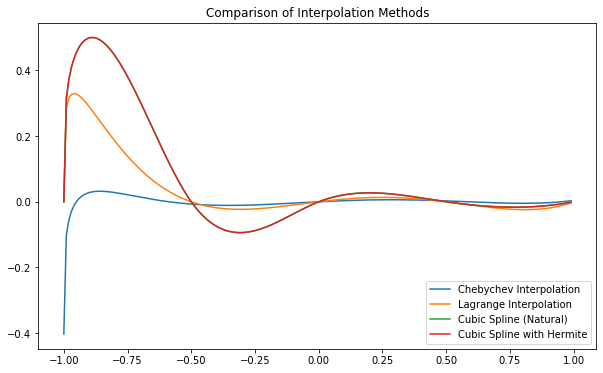

In [16]:
fig, ax = plt.subplots(figsize = (10,6))

line1, = ax.plot(x_grid, fx_cheb_error, label = 'Chebychev Interpolation')
line2, = ax.plot(x_grid, fx_Lag_error, label = 'Lagrange Interpolation')
line3, = ax.plot(x_grid, fx_Ncubic_error, label = 'Cubic Spline (Natural)')
line4, = ax.plot(x_grid, fx_Ncubic_H_error, label = 'Cubic Spline with Hermite')
ax.legend(loc='lower right')
ax.set_title('Comparison of Interpolation Methods')
plt.show()

Except for a small interval Chebychev interpolation performs best which can be ignored. Although Hermit Spline seems enhancing the performance, there does not seem a considerable difference. Both Cubic Spline methods perform poorly. Lagrange interpolation also performs bad, but not as much as Cubic Spline. 

# Question 2

$$ f(x) = \min \{ 1, \max [-1, 4(x-0.2)]\} $$

In [17]:
func2 = lambda x: np.min([1, np.max([-1, 4*(x-0.2)])])
func2v = np.vectorize(func2)

In [18]:
x_grid = np.arange(xlb, xub, step = 0.01) 
fx_grid = func2v(x_grid)
step_data = (xub-xlb)/4
x_data = np.array([xlb+i*step_data for i in range(5)])
fx_data = func2v(x_data)

The function looks like:

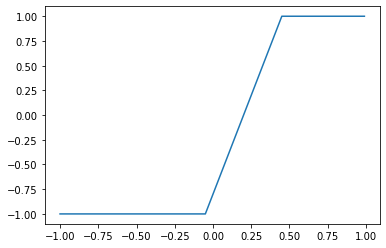

In [19]:
plt.plot(x_grid, func2v(x_grid))
plt.show()

### 1. Chebyshev Interpolation

In [20]:
m = 5

x_data_cheb = np.zeros(m)
for i in range(m):
    x_data_cheb[i] = xlb + (xub-xlb)/2*(-np.cos((2*(i+1)-1)*np.pi/(2*m))+1.0)
    
fx_data_cheb = func2v(x_data_cheb)    

In [21]:
# Choose n <= m-1
n = 4

coef = np.zeros(n+1)

Tmat = np.zeros((n+1,m))
Tmat[0,:] = 1.0
Tmat[1,:] = x_data_cheb[:]

for k in range(2,n+1):
    Tmat[k,:] = 2*np.reshape(x_data_cheb,(1,m))*Tmat[k-1,:]-Tmat[k-2,:]

    
for k in range(n+1):
    coef[k] = np.array(fx_data_cheb)@Tmat[k,:]
    
coef[0] /= m
coef[1:] /= (m/2)

fx_cheb = np.polynomial.chebyshev.chebval(x_grid,coef)
fx_cheb_error = fx_grid - fx_cheb

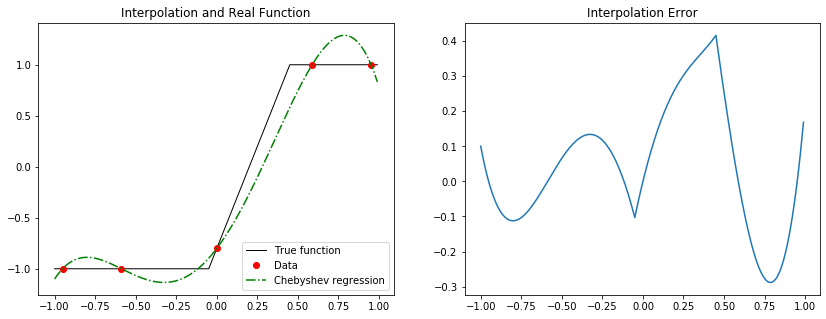

In [22]:
fig, ax = plt.subplots(1,2, figsize = def_fig_size)

line1, = ax[0].plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax[0].plot(x_data_cheb, fx_data_cheb, 'ro', linewidth=1, label='Data')
line3, = ax[0].plot(x_grid, fx_cheb, 'g-.', label='Chebyshev regression')
ax[0].legend(loc='lower right')
ax[0].set_title('Interpolation and Real Function')
line4, = ax[1].plot(x_grid, fx_cheb_error, label = 'Error')
ax[1].set_title('Interpolation Error')
plt.show()

### 2. Lagrange Interpolation

In [23]:
int_Lag = laginterp(x_data,fx_data)
fx_Lag = int_Lag(x_grid)
fx_Lag_error = fx_grid - fx_Lag

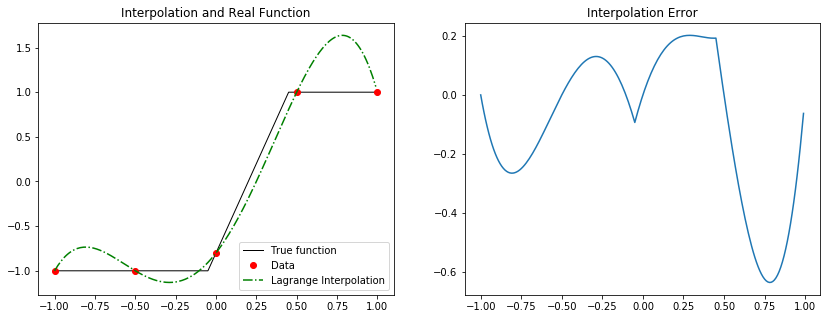

In [24]:
fig, ax = plt.subplots(1,2, figsize = def_fig_size)

line1, = ax[0].plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax[0].plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax[0].plot(x_grid, fx_Lag, 'g-.', label='Lagrange Interpolation')
ax[0].legend(loc='lower right')
ax[0].set_title('Interpolation and Real Function')
line4, = ax[1].plot(x_grid, fx_Lag_error, label = 'Error')
ax[1].set_title('Interpolation Error')
plt.show()

### 3. Cubic spline with the natural spline

In [25]:
int_Ncubic = interpolate.CubicSpline(x_data,fx_data,bc_type='clamped')
fx_Ncubic = int_Ncubic(x_grid)
fx_Ncubic_error = fx_grid - fx_Ncubic

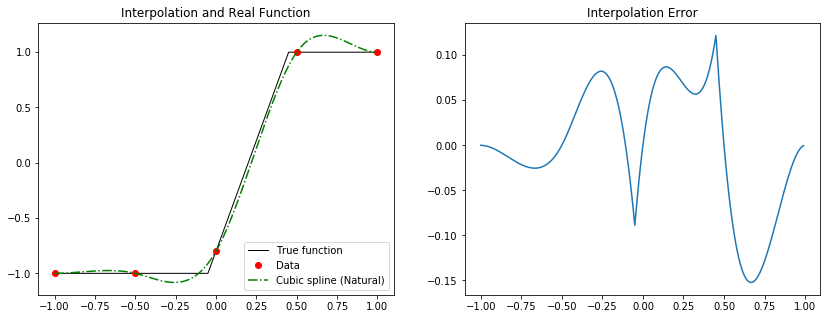

In [26]:
fig, ax = plt.subplots(1,2, figsize = def_fig_size)

line1, = ax[0].plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax[0].plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax[0].plot(x_grid, fx_Ncubic, 'g-.', label='Cubic spline (Natural)')
ax[0].legend(loc='lower right')
ax[0].set_title('Interpolation and Real Function')
line4, = ax[1].plot(x_grid, fx_Ncubic_error, label = 'Error')
ax[1].set_title('Interpolation Error')
plt.show()

### 4. Linear Interpolation

I take function from lecture notes:

In [27]:
def lininterp(x,y):
    # Linear interpolation given that x is an equally spaced grid
    def interpolant(z):
        
        i = int( (z-x[0]) // (x[1]-x[0]) )
        
        if i<len(x)-1:
            r = y[i] + (z-x[i])*(y[i+1]-y[i])/(x[i+1]-x[i])
        else:
            r = y[-1]
        
        return r
    
    return np.vectorize(interpolant)

In [28]:
int_Linear = lininterp(x_data,fx_data)
fx_Linear = int_Linear(x_grid)
fx_Linear_error = fx_grid - fx_Linear

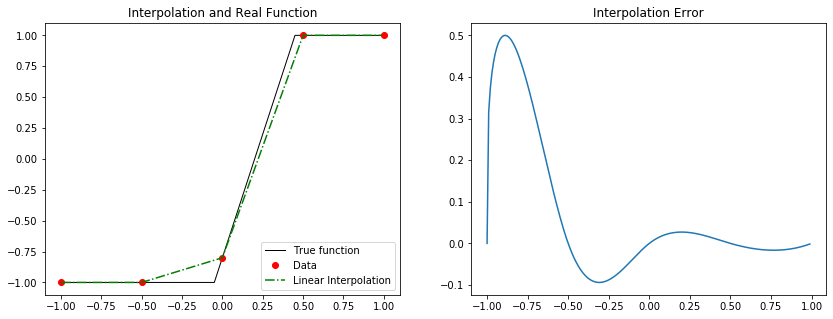

In [29]:
fig, ax = plt.subplots(1,2, figsize = def_fig_size)

line1, = ax[0].plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax[0].plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax[0].plot(x_grid, fx_Linear, 'g-.', label='Linear Interpolation')
ax[0].legend(loc='lower right')
ax[0].set_title('Interpolation and Real Function')
line4, = ax[1].plot(x_grid, fx_Ncubic_H_error, label = 'Error')
ax[1].set_title('Interpolation Error')
plt.show()

Let's Compare errors:

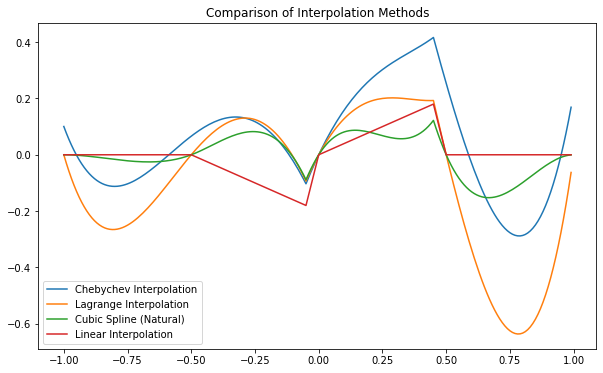

In [30]:
fig, ax = plt.subplots(figsize = (10,6))

line1, = ax.plot(x_grid, fx_cheb_error, label = 'Chebychev Interpolation')
line2, = ax.plot(x_grid, fx_Lag_error, label = 'Lagrange Interpolation')
line3, = ax.plot(x_grid, fx_Ncubic_error, label = 'Cubic Spline (Natural)')
line4, = ax.plot(x_grid, fx_Linear_error, label = 'Linear Interpolation')
ax.legend(loc='lower left')
ax.set_title('Comparison of Interpolation Methods')
plt.show()

Chebyshev and Lagrange interpolation perform bad because function is kinky. Cubic spline and Linear Interpolation performs relatively good. Except some intervals, in general, Linear interpolation fits almost perfectly. 

# Question 3

$$ f(x) = \dfrac{1}{1+x^2} $$

In [31]:
func3 = lambda x: 1/(1+x**2)
func3v = np.vectorize(func3)

Since we can only work with [-1,1] interval with Chebyshev interpolation we need to redefine the function to change domain:

$$ f(5x) = g(x) = \dfrac{1}{1 + (5x) ^2} $$

In [32]:
func3 = lambda x: 1/(1+(5*x)**2)
func3v = np.vectorize(func3)

We implement the Chebychev interpolation in the same way:

In [33]:
x_grid = np.arange(xlb, xub, step = 0.01) 
fx_grid = func3v(x_grid)
step_data = (xub-xlb)/4
x_data = np.array([xlb+i*step_data for i in range(5)])
fx_data = func3v(x_data)

In [34]:
m = 11

x_data_cheb = np.zeros(m)
for i in range(m):
    x_data_cheb[i] = xlb + (xub-xlb)/2*(-np.cos((2*(i+1)-1)*np.pi/(2*m))+1.0)
    
fx_data = func3v(x_data_cheb)    

In [35]:
def cheb(n):
    # Choose n <= m-1
    coef = np.zeros(n+1)

    Tmat = np.zeros((n+1,m))
    Tmat[0,:] = 1.0
    Tmat[1,:] = x_data_cheb[:]

    for k in range(2,n+1):
        Tmat[k,:] = 2*np.reshape(x_data_cheb,(1,m))*Tmat[k-1,:]-Tmat[k-2,:]


    for k in range(n+1):
        coef[k] = np.array(fx_data)@Tmat[k,:]

    coef[0] /= m
    coef[1:] /= (m/2)

    fx_cheb = np.polynomial.chebyshev.chebval(x_grid,coef)
    fx_cheb_error = fx_grid - fx_cheb
    return fx_cheb, fx_cheb_error

I multiply domains by 5 in order to extend function to [-5,5] interval:

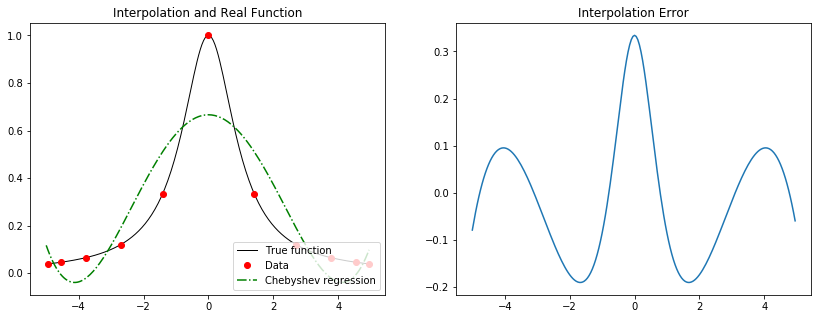

In [36]:
fx_cheb, fx_cheb_error = cheb(5)
fig, ax = plt.subplots(1,2, figsize = def_fig_size)

line1, = ax[0].plot(x_grid * 5, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax[0].plot(x_data_cheb * 5, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax[0].plot(x_grid * 5, fx_cheb, 'g-.', label='Chebyshev regression')
ax[0].legend(loc='lower right')
ax[0].set_title('Interpolation and Real Function')
line4, = ax[1].plot(x_grid * 5, fx_cheb_error, label = 'Error')
ax[1].set_title('Interpolation Error')
plt.show()

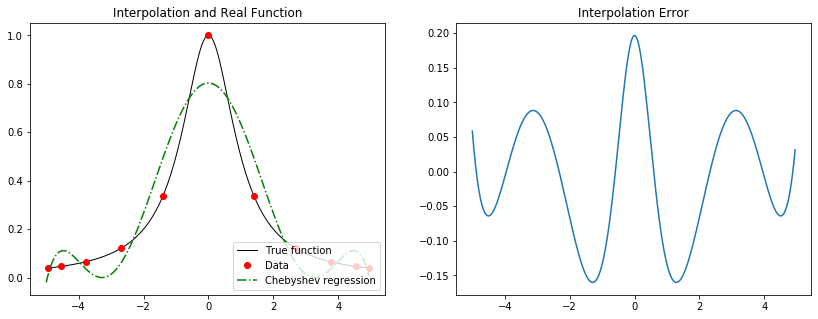

In [37]:
fx_cheb, fx_cheb_error = cheb(7)
fig, ax = plt.subplots(1,2, figsize = def_fig_size)

line1, = ax[0].plot(x_grid * 5, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax[0].plot(x_data_cheb * 5, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax[0].plot(x_grid * 5, fx_cheb, 'g-.', label='Chebyshev regression')
ax[0].legend(loc='lower right')
ax[0].set_title('Interpolation and Real Function')
line4, = ax[1].plot(x_grid * 5, fx_cheb_error, label = 'Error')
ax[1].set_title('Interpolation Error')
plt.show()

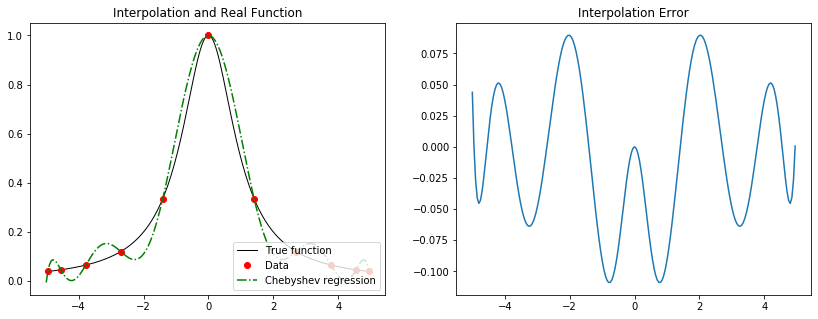

In [38]:
fx_cheb, fx_cheb_error = cheb(10)
fig, ax = plt.subplots(1,2, figsize = def_fig_size)

line1, = ax[0].plot(x_grid * 5, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax[0].plot(x_data_cheb * 5, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax[0].plot(x_grid * 5, fx_cheb, 'g-.', label='Chebyshev regression')
ax[0].legend(loc='lower right')
ax[0].set_title('Interpolation and Real Function')
line4, = ax[1].plot(x_grid * 5, fx_cheb_error, label = 'Error')
ax[1].set_title('Interpolation Error')
plt.show()

It performs better as $n$ increases. In fact, interpolation fits to data points only if $n=10$.

# Question 4

$$ f(x_1, x_2) = \dfrac{5 \sin (x_1)}{x_1} * \big \{\max (20 - |x_2|,0)\big \} ^{1.2} $$

In [39]:
from mpl_toolkits import mplot3d

In [40]:
def f(x1, x2):
    return ((5 * np.sin(x1))/x1) * (np.max([20 - np.absolute(x2), 0])) ** 1.2

fv = np.vectorize(f)

In [41]:
x1_grid = np.linspace(-30,30,1000)
x2_grid = np.linspace(-30,30,1000)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
f_grid = fv(x1_grid, x2_grid)

I plot the function from different angles.

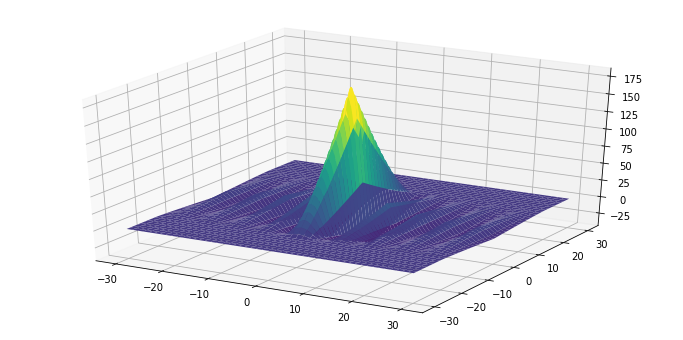

In [42]:
plt.figure(figsize=(12,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, f_grid, cmap='viridis')

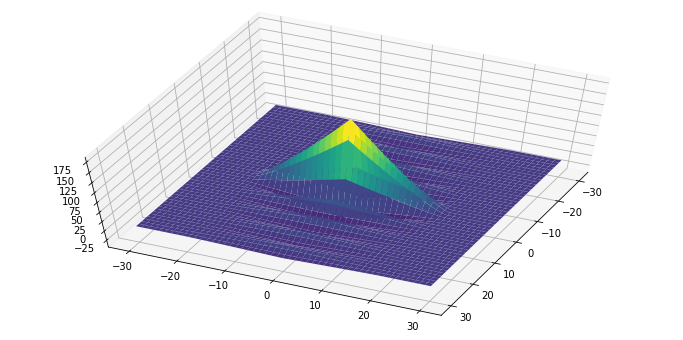

In [43]:
plt.figure(figsize=(12,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, f_grid, cmap='viridis')
ax.view_init(60, 25)

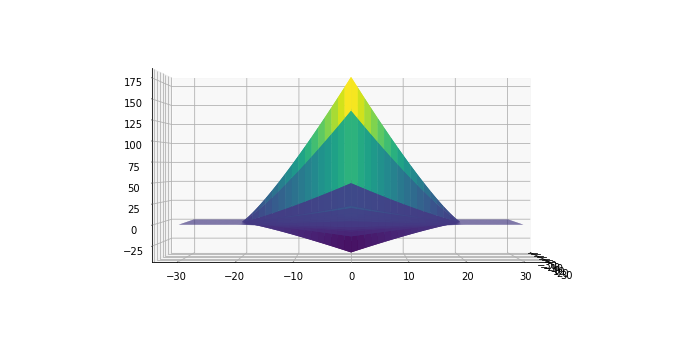

In [44]:
plt.figure(figsize=(12,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, f_grid, cmap='viridis')
ax.view_init(0, 0)

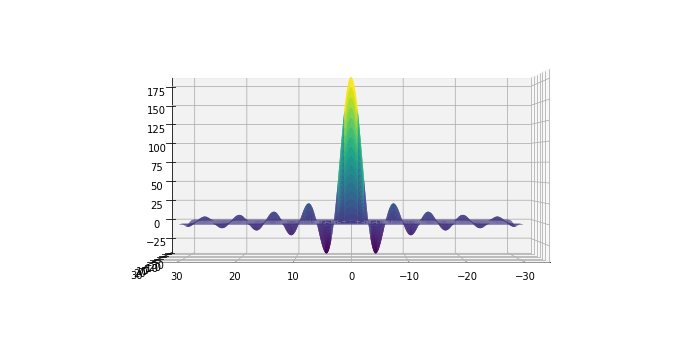

In [45]:
plt.figure(figsize=(12,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, f_grid, cmap='viridis')
ax.view_init(0, 90)

I rewrite function and derivative function to solve by scipy. 

In [46]:
def f_(x):
    return ((5 * np.sin(x[0]))/x[0]) * (np.max([20 - np.absolute(x[1]), 0])) ** 1.2

In [47]:
def df_(x):
    dfx1 = (((5 * np.cos(x[0]))/x[0]) - ((5 * np.sin(x[0]))/(x[0]**2)) )* (np.max([20 - np.absolute(x[1]), 0])) ** 1.2
    if np.absolute(x[1]) >= 20:
        dfx2 = 0
    else: 
        dfx2 = ((5 * np.sin(x[0]))/x[0]) * 1.2 
    return [dfx1, dfx2]

BFGS and Nelder-Mead optimization methods are implemented with given initial points:

In [48]:
x0 = np.array([-25, 25])

# BFGS method
res = optimize.minimize(f_, x0, method='BFGS',
               jac=df_,
               options={'gtol': 1e-6, 'disp': True})

print('-----')
print(res)

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
-----
      fun: -0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: [-0.0, 0]
  message: 'Optimization terminated successfully.'
     nfev: 1
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-25.,  25.])


In [49]:
x0 = np.array([-25, 25])
# Nelder-Mead method
res = optimize.minimize(f_, x0, method='Nelder-Mead',
               options={'xtol': 1e-8,'disp': True})

print('-----')
print(res)


Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 28
         Function evaluations: 111
-----
 final_simplex: (array([[-25.        ,  25.        ],
       [-25.00000001,  25.        ],
       [-25.        ,  25.00000001]]), array([-0., -0., -0.]))
           fun: -0.0
       message: 'Optimization terminated successfully.'
          nfev: 111
           nit: 28
        status: 0
       success: True
             x: array([-25.,  25.])


We couldn't approximate the solution with either methods because initial point has a flat surface, no slope. Therefore we cannot approximate the solution through gradient descent. 

## Minimization with Sobol Sequence

In [50]:
import sobol_seq

Before solving Sobol sequence let's examine the function. $\max (20 - |x_2|,0)$ is independent from $x_1$. Therefore if the other part of the function can be negative we would like to maximize this part, if so $x_2=0$ (This can be seen in one of the 3D plots). Since only the $\sin (x)/x$ can be negative we can say that it's minimum is the global minimum when $x_2 = 0$. 

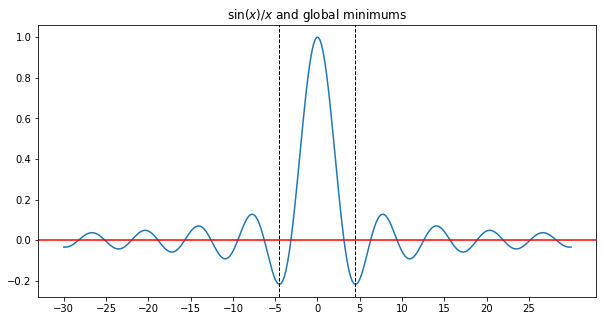

In [51]:
sinx_x = lambda x: np.sin(x)/x
plt.figure(figsize=(10,5))
plt.plot(np.linspace(-30,30,300), sinx_x(np.linspace(-30,30,300)))
plt.axhline(y=0, color = 'r')
plt.axvline(x=4.49340945790906, color = 'black', ls = '--', lw = '1')
plt.axvline(x=-4.49340945790906, color = 'black', ls = '--', lw = '1')
plt.title('$\sin (x)/x$ and global minimums')
plt.xticks(range(-30,30,5))
plt.show()

We can observe the same functional behaviour in the last 3D plot above. 

As $\sin(x)$ borders in $[-1,1]$ if we increase the |x| we will get smaller results. It can also be observed that $sin(x)$ is an odd function and $x$ too is an odd function, therefore $sin(x)/x$ is a even function, therefore symmetric regarding the y-axis. Consequently there will be no global Minimum for the function as any value we find for a positiv x can also be found for a negative x. Let's assume we want to find the minimum of the function. So we only have to find the minimum for sin(x)/x for x>0. By differentiation and equating this to 0, we'll find that f(4.49..,0) is one of the minimal values. Analytical solution is:

$$ x_1 \approx \pm 4.49340945790906...\qquad \text{ and } \qquad x_2 = 0 $$

Suppose we have no such prior information about the function. We can implement random search with Sobol as follows:

In [52]:
sobol = sobol_seq.i4_sobol_generate(2, 1000)

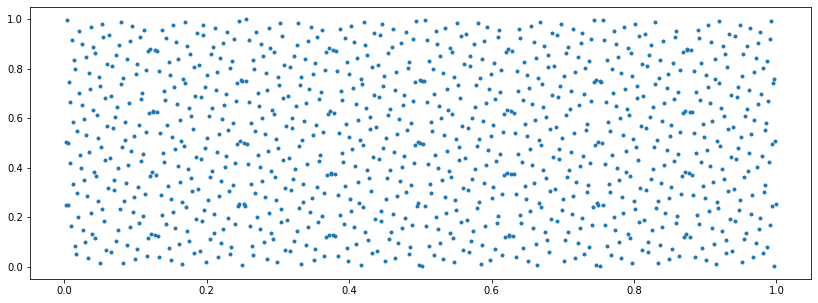

In [53]:
fig, ax = plt.subplots(figsize = def_fig_size)
line1, = ax.plot(sobol[:,0], sobol[:,1], '.')
plt.show()

I will now extend the interval from $[0,1]$ to $[-30,30]$:

In [54]:
sobol = sobol * 60 - 30

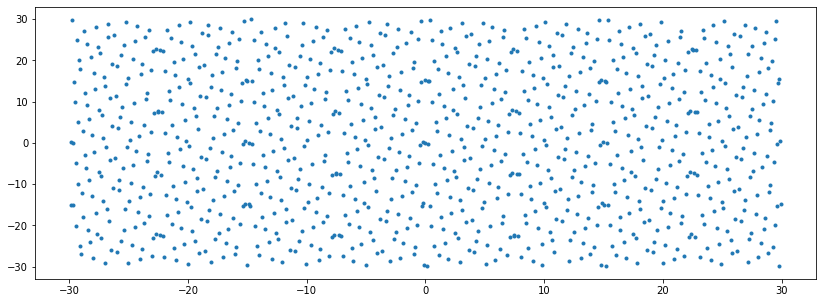

In [55]:
fig, ax = plt.subplots(figsize = def_fig_size)
line1, = ax.plot(sobol[:,0], sobol[:,1], '.')
plt.show()

I define the function to find optimum with Nelder-Mead optimization through Sobol sequence:

In [56]:
def random_search_sobol(sobol_sequence, theta = 0.9):
    #The first update
    
    res = optimize.minimize(f_, sobol_sequence[0], method='Nelder-Mead',
               options={'xtol': 1e-6,'disp': False})
    best = [res.x, res.fun]
    
    # Iteration through the Sobol sequence..
    for i in range(1, len(sobol_sequence)):
        x0 = theta * best[0] + (1- theta) * sobol_sequence[i]
        
        res = optimize.minimize(f_, x0, method='Nelder-Mead',
               options={'xtol': 1e-8,'disp': False})
        
        if res.fun < best[1]: # Updating best result if better
            best = [res.x, res.fun]
    return best

The Function apply Nelder Mead method through the Sobol sequence: $$ x_j = \theta * best_j  + (1-\theta ) * sobol_j $$

$x_j$ is the initial value at iteration $j$, $best_j$ is the best solution points until iteration $j$, and $sobol_j$ is the quasi-random Sobol sequence. 

In [57]:
best = random_search_sobol(sobol, theta = 0.9)

C:\ProgramData\Anaconda3\envs\econ\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [58]:
print('Points: ', best[0], '\nFunction value: ', best[1])

Points:  [4.49340946e+00 1.00436054e-15] 
Function value:  -39.54877672148266


Approximation is very very close to the analytical solution. We may increase the precision by extending the Sobol sequence but no further improvement is required. Python rounds the approximation error to zero:

In [59]:
print('Function value for the global minimum: ', f(4.49340945790906, 0))
print('Function value for the minimum approximation: ', best[1])
print('Approximation value error: ', f(4.49340945790906, 0)- best[1])

Function value for the global minimum:  -39.54877672148266
Function value for the minimum approximation:  -39.54877672148266
Approximation value error:  0.0


Note that we have two global minimums: $$ x_1 \approx ± 4.49340945790906...\qquad \text{ and } \qquad x_2 = 0 $$

Our algorithm converges only to one because search is not truely random. With different initial parameterization we may obtain the other global minimum as well.